Questions:

Was George Michael more sucessful as a solo artist or as part of Wham!?

Are acoustic songs slower than non acoustic songs? 

Are acoustic songs lower energy / less dancey than non acoustic songs?

What key was most popular for Wham! and George Michael?

In [1]:
import pandas as pd
import chart_studio.plotly as py
import cufflinks as cf
import pandas as pd
import numpy as np
%matplotlib inline
cf.go_offline()
import chart_studio.plotly as py
import cufflinks as cf
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact, interactive, fixed, interact_manual

ModuleNotFoundError: No module named 'cufflinks'

In [2]:
import spotipy.util as util
import spotipy
import os.path as path
import matplotlib.pyplot as plt
import seaborn as sns

username = 'ninahew'
client_id ='a758a8092e3b45949388c4123f79948f'
client_secret = 'c8025d9d9bb24c1c8f6156a5f66dcfe1'
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played'

from spotipy.oauth2 import SpotifyClientCredentials

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, 
                                                                              client_secret=client_secret))

In [3]:
wham_search = spotify.search(q='wham!', type='artist')
wham_id = wham_search['artists']['items'][0]['id']
wham_id

'5lpH0xAS4fVfLkACg9DAuM'

In [4]:
gm_search = spotify.search(q='George Michael', type='artist')
gm_id = gm_search['artists']['items'][0]['id']
gm_id

'19ra5tSw0tWufvUp8GotLo'

In [5]:
def is_wham_gm(track):
    all_artist_ids = [artist['id'] for artist in track['artists']]
    if (gm_id in all_artist_ids) or (wham_id in all_artist_ids):
        return True
    else:
        return False

df = pd.DataFrame()
filepath = "../data/George Michael Wham Back Catalogue.csv"
if not path.exists(filepath):
    artists = [wham_id, gm_id]
    for artist in artists: 
        albums = spotify.artist_albums(artist)
        for album in albums['items']:
            tracks = spotify.album_tracks(album['id'])
            for track in tracks['items']:
                if is_wham_gm(track):
                    full_track = spotify.track(track['id'])
                    audio_features = spotify.audio_features(track['id'])[0]
                    audio_features['track_name'] = track['name']
                    audio_features['album_name'] = album['name']
                    audio_features['album_type'] = album['album_type']
                    audio_features['artist'] = ', '.join(sorted([artist['name'] for artist in track['artists']]))
                    audio_features['release_date'] = album['release_date']
                    audio_features['popularity'] = full_track['popularity']
                    df = df.append(audio_features, ignore_index=True)
    df.to_csv(path_or_buf = filepath)
else:
    df = pd.read_csv(filepath)
    
df.sample(3)

,Unnamed: 0,acousticness,album_name,album_type,analysis_url,artist,danceability,duration_ms,energy,id,...,popularity,release_date,speechiness,tempo,time_signature,track_href,track_name,type,uri,valence
67,67,0.40200,The Final,compilation,https://api.spotify.com/v1/audio-analysis/1KGY...,Wham!,0.874,389533.0,0.514,1KGY5iWRhJe9Lq3DiHMfav,...,34.0,1986-11-25,0.0313,114.960,4.0,https://api.spotify.com/v1/tracks/1KGY5iWRhJe9...,Everything She Wants - Remix,audio_features,spotify:track:1KGY5iWRhJe9Lq3DiHMfav,0.919
153,153,0.00258,Listen Without Prejudice / MTV Unplugged (Deluxe),album,https://api.spotify.com/v1/audio-analysis/4xTj...,George Michael,0.761,272372.0,0.771,4xTjhIFjK1iF91dHIJ6MLJ,...,34.0,2017-10-20,0.0535,117.857,4.0,https://api.spotify.com/v1/tracks/4xTjhIFjK1iF...,Fantasy '98,audio_features,spotify:track:4xTjhIFjK1iF91dHIJ6MLJ,0.910
30,30,0.04970,Music From The Edge Of Heaven,album,https://api.spotify.com/v1/audio-analysis/5EVd...,Wham!,0.799,365040.0,0.580,5EVdXMj2nUjHiCEvE60kQC,...,36.0,1986-07-01,0.0624,132.265,4.0,https://api.spotify.com/v1/tracks/5EVdXMj2nUjH...,I'm Your Man,audio_features,spotify:track:5EVdXMj2nUjHiCEvE60kQC,0.516


In [6]:
var_artists = df['artist'].unique()[2:]
var_artists

array(['George Michael, Nile Rodgers', 'George Michael, Paul McCartney',
       'Astrud Gilberto, George Michael',
       'George Michael, Mary J. Blige, Tommy Theo, Waze & Odyssey',
       'George Michael, Kinky Roland',
       'George Michael, Phil Romano, Steve Redant',
       'George Michael, Stereogamous', 'George Michael, Voodoo Sonics',
       'George Michael, James Jackman', 'David Kay, George Michael'],
      dtype=object)

In [7]:
df = df[df['artist'].isin(['Wham!', 'George Michael'])]
df = df[df['release_date'] < '2016-12-25']
df.sample(10)

,Unnamed: 0,acousticness,album_name,album_type,analysis_url,artist,danceability,duration_ms,energy,id,...,popularity,release_date,speechiness,tempo,time_signature,track_href,track_name,type,uri,valence
74,74,0.1270,"Wham 12"" Mixes",compilation,https://api.spotify.com/v1/audio-analysis/40tB...,Wham!,0.865,311573.0,0.837,40tBOINAHc3KRIBKbKnp4j,...,27.0,1985-01-03,0.0702,115.521,4.0,https://api.spotify.com/v1/tracks/40tBOINAHc3K...,Young Guns (Go For It!),audio_features,spotify:track:40tBOINAHc3KRIBKbKnp4j,0.9410
240,240,0.0955,Faith,album,https://api.spotify.com/v1/audio-analysis/2cW6...,George Michael,0.683,306120.0,0.879,2cW6n6IWegwwLhsgL6FmUD,...,35.0,1987-10-30,0.0459,97.062,4.0,https://api.spotify.com/v1/tracks/2cW6n6IWegww...,Monkey - Remastered,audio_features,spotify:track:2cW6n6IWegwwLhsgL6FmUD,0.7020
165,165,0.1800,Symphonica,album,https://api.spotify.com/v1/audio-analysis/5P4j...,George Michael,0.495,444088.0,0.596,5P4j0KhOSwt6rqsMZTiXbT,...,6.0,2014-01-01,0.0376,128.932,3.0,https://api.spotify.com/v1/tracks/5P4j0KhOSwt6...,Cowboys And Angels - Live,audio_features,spotify:track:5P4j0KhOSwt6rqsMZTiXbT,0.2590
171,171,0.1690,Symphonica (Deluxe Version),album,https://api.spotify.com/v1/audio-analysis/5zLz...,George Michael,0.530,116731.0,0.716,5zLzSCTEdbEh2sGnaplWt4,...,35.0,2014-01-01,0.1130,145.655,4.0,https://api.spotify.com/v1/tracks/5zLzSCTEdbEh...,My Baby Just Cares For Me - Live,audio_features,spotify:track:5zLzSCTEdbEh2sGnaplWt4,0.5560
239,239,0.3700,Faith,album,https://api.spotify.com/v1/audio-analysis/29y5...,George Michael,0.772,277800.0,0.915,29y5Zo71b6ABt1Czf6XeWc,...,33.0,1987-10-30,0.0430,124.365,4.0,https://api.spotify.com/v1/tracks/29y5Zo71b6AB...,Look at Your Hands - Remastered,audio_features,spotify:track:29y5Zo71b6ABt1Czf6XeWc,0.6450
167,167,0.5010,Symphonica,album,https://api.spotify.com/v1/audio-analysis/3p43...,George Michael,0.433,291072.0,0.464,3p43d8uAeA9xwm8xXDZ9Ej,...,5.0,2014-01-01,0.0329,94.464,3.0,https://api.spotify.com/v1/tracks/3p43d8uAeA9x...,Brother Can You Spare A Dime - Live,audio_features,spotify:track:3p43d8uAeA9xwm8xXDZ9Ej,0.0899
34,34,0.2110,Music From The Edge Of Heaven,album,https://api.spotify.com/v1/audio-analysis/6hoU...,Wham!,0.553,342867.0,0.496,6hoUWEGKF3BgIdXrDOiF6c,...,37.0,1986-07-01,0.0317,96.536,4.0,https://api.spotify.com/v1/tracks/6hoUWEGKF3Bg...,Where Did Your Heart Go?,audio_features,spotify:track:6hoUWEGKF3BgIdXrDOiF6c,0.6530
212,212,0.0498,Older,album,https://api.spotify.com/v1/audio-analysis/2LsM...,George Michael,0.740,324813.0,0.641,2LsMTyB7MHaXV8di0bS7Qh,...,17.0,1996-05-13,0.0769,104.452,4.0,https://api.spotify.com/v1/tracks/2LsMTyB7MHaX...,"Fastlove, Pt. 1",audio_features,spotify:track:2LsMTyB7MHaXV8di0bS7Qh,0.5270
279,279,0.3260,True Faith,single,https://api.spotify.com/v1/audio-analysis/2ZTb...,George Michael,0.248,263627.0,0.488,2ZTbA381eh9yKVFJ0i5eNx,...,0.0,2011-04-04,0.0383,206.065,4.0,https://api.spotify.com/v1/tracks/2ZTbA381eh9y...,True Faith,audio_features,spotify:track:2ZTbA381eh9yKVFJ0i5eNx,0.1550
220,220,0.2810,Older,album,https://api.spotify.com/v1/audio-analysis/220M...,George Michael,0.603,331027.0,0.244,220MZosagfCB3wxNkOkBo3,...,10.0,1996-05-13,0.0274,136.813,4.0,https://api.spotify.com/v1/tracks/220MZosagfCB...,You Have Been Loved,audio_features,spotify:track:220MZosagfCB3wxNkOkBo3,0.1890


In [8]:
list(df.columns)

['Unnamed: 0',
 'acousticness',
 'album_name',
 'album_type',
 'analysis_url',
 'artist',
 'danceability',
 'duration_ms',
 'energy',
 'id',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'release_date',
 'speechiness',
 'tempo',
 'time_signature',
 'track_href',
 'track_name',
 'type',
 'uri',
 'valence']

In [9]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['album_year'] = df['album_name'] + ' (' + df['release_date'].map(lambda dt: str(dt.year)) + ')' 


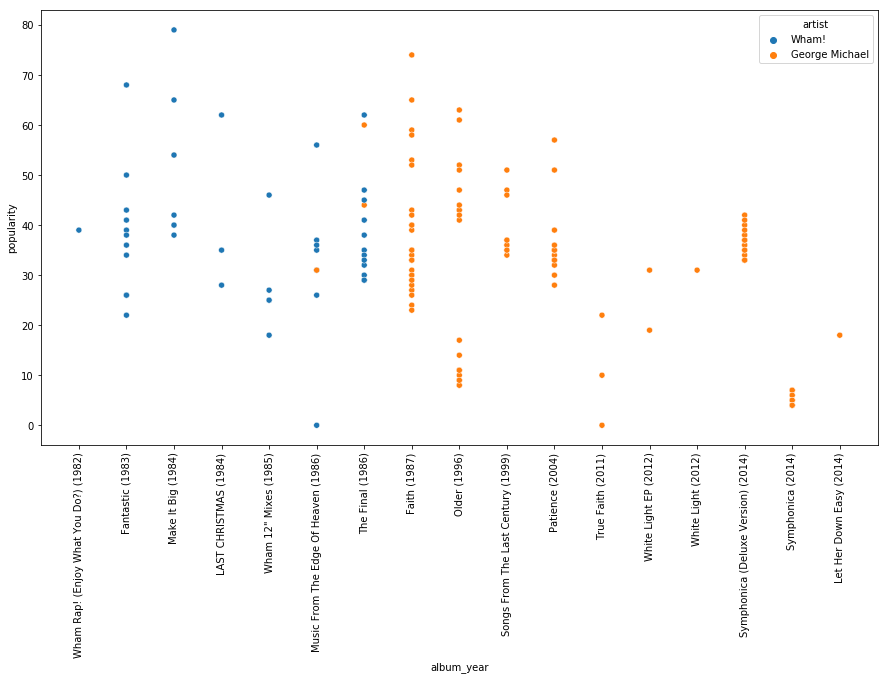

In [10]:
df.sort_values('release_date', ascending = True, inplace = True)
plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)


sns.scatterplot(x = df['album_year'], y = df['popularity'], hue = df['artist'])

In [13]:
df.iplot(x = df['album_year'], y = df['popularity'], categories=df['track_name'])



AttributeError: 'DataFrame' object has no attribute 'iplot'

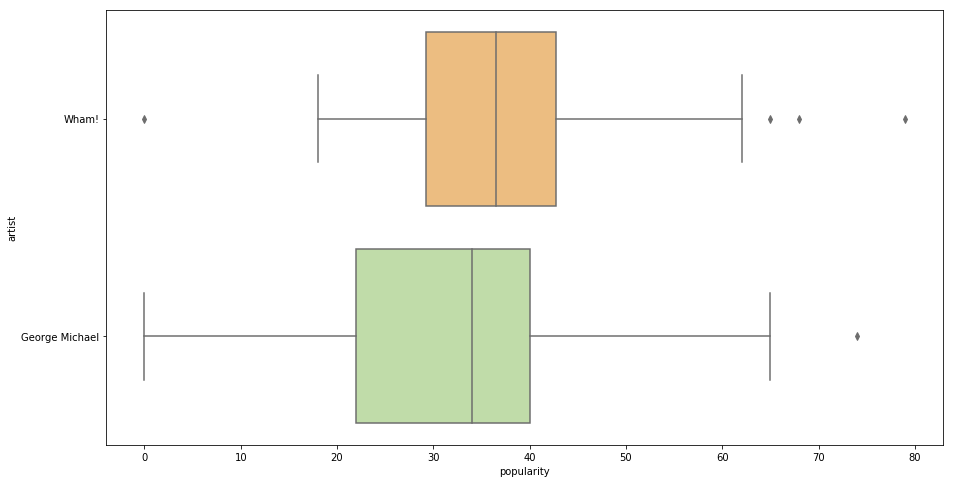

In [56]:
plt.figure(figsize=(15,8))
sns.boxplot(data = df, x= 'popularity', y = 'artist', palette = 'Spectral')

In [32]:
df[['artist', 'track_name', 'popularity']].sort_values('popularity').head(3)

,artist,track_name,popularity
279,George Michael,True Faith,0.0
35,Wham!,Last Christmas - Pudding Mix,0.0
169,George Michael,You've Changed - Live,4.0


In [33]:
df[['artist', 'track_name', 'popularity']].sort_values('popularity').tail(3)

,artist,track_name,popularity
50,Wham!,Club Tropicana,68.0
252,George Michael,Faith - Remastered,74.0
36,Wham!,Wake Me up Before You Go-Go,79.0


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

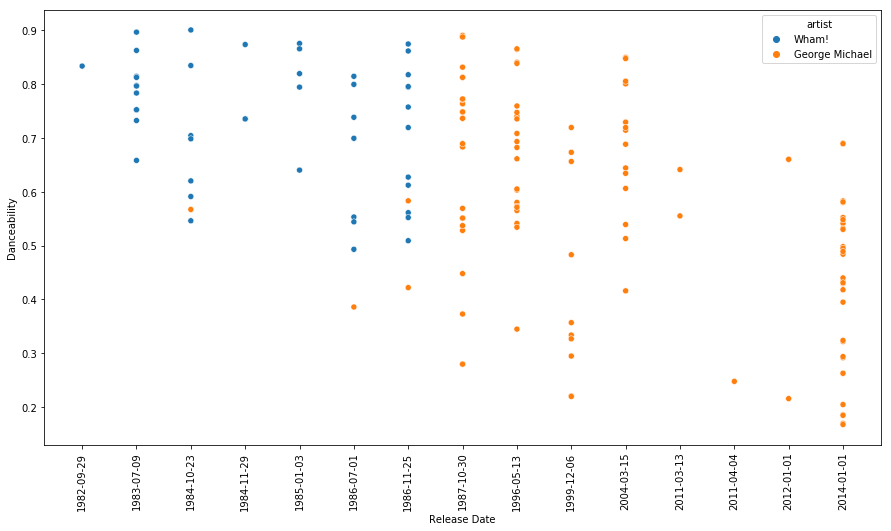

In [35]:
df.loc['release_date'] = pd.to_datetime(df['release_date'], format="%Y/%m/%d")
df2 = df[['release_date', 'danceability', 'artist']]
df2.sort_values('release_date', ascending= True)
plt.figure(figsize=(15,8))
plt.xlabel('Release Date')
plt.xticks(rotation = 90)
plt.ylabel('Danceability')
plot = sns.scatterplot(x = df2['release_date'], y = df2['danceability'], hue = df2['artist'])
plot
#Need to sort x axis 
#Need to consider whether to change artists to 'various'

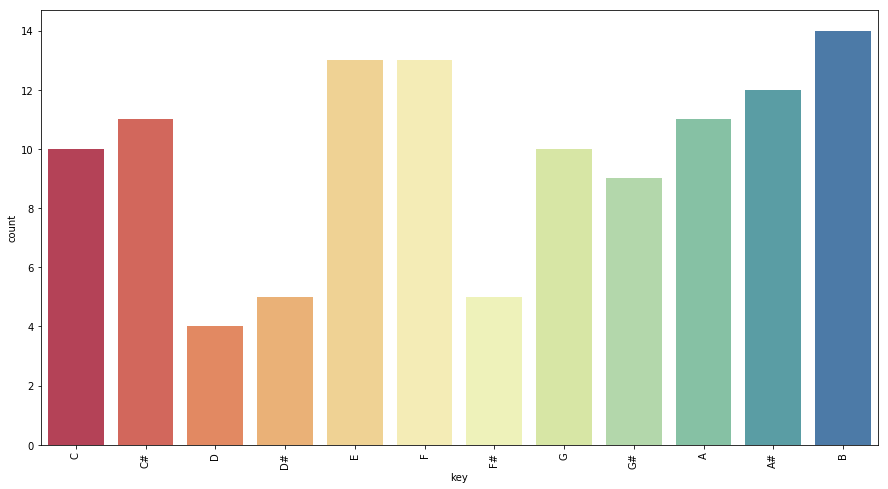

In [40]:
dfgm = df[df['artist']== 'George Michael'].sort_values('key')
dfgm['key']
plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)

keys = ["C","C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

dfgm['key'] = dfgm['key'].map(lambda i : keys[int(i)])

sns.countplot(x= dfgm['key'],palette = 'Spectral')

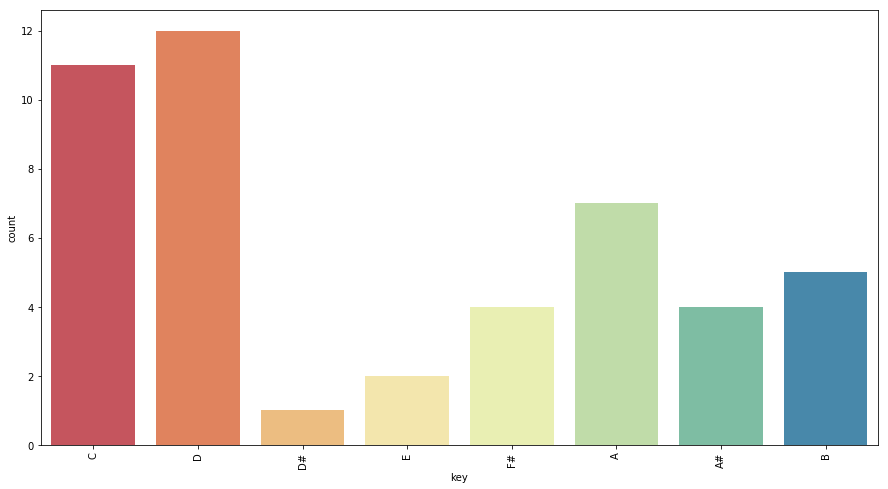

In [41]:
dfwham = df[df['artist']== 'Wham!'].sort_values('key')
plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)

keys = ["C","C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

dfwham['key'] = dfwham['key'].map(lambda i : keys[int(i)])

sns.countplot(x= dfwham['key'], palette = 'Spectral')


In [52]:
keys = ["C","C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]


#df['key'] = df['key'].map(lambda i : keys[int(i)])

df.tail(3)

#sns.countplot(x=df['key'], hue=df['artist'])

,Unnamed: 0,acousticness,album_name,album_type,analysis_url,artist,danceability,duration_ms,energy,id,...,popularity,release_date,speechiness,tempo,time_signature,track_href,track_name,type,uri,valence
186,186,0.759,Symphonica (Deluxe Version),album,https://api.spotify.com/v1/audio-analysis/2Flo...,George Michael,0.205,284754.0,0.248,2FloXm39LezJKkYpe3aj7O,...,33.0,2014-01-01,0.0409,58.555,4.0,https://api.spotify.com/v1/tracks/2FloXm39LezJ...,You've Changed - Live,audio_features,spotify:track:2FloXm39LezJKkYpe3aj7O,0.0731
174,174,0.919,Symphonica (Deluxe Version),album,https://api.spotify.com/v1/audio-analysis/0LlA...,George Michael,0.431,230508.0,0.136,0LlAIj8FCkmiJ9WOvUIimM,...,41.0,2014-01-01,0.0394,119.019,4.0,https://api.spotify.com/v1/tracks/0LlAIj8FCkmi...,Let Her Down Easy - Live,audio_features,spotify:track:0LlAIj8FCkmiJ9WOvUIimM,0.4200
release_date,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
dfwham['time_signature'].unique()

array([4.])

In [64]:
dfgm['time_signature'].unique()

array([4., 3.])

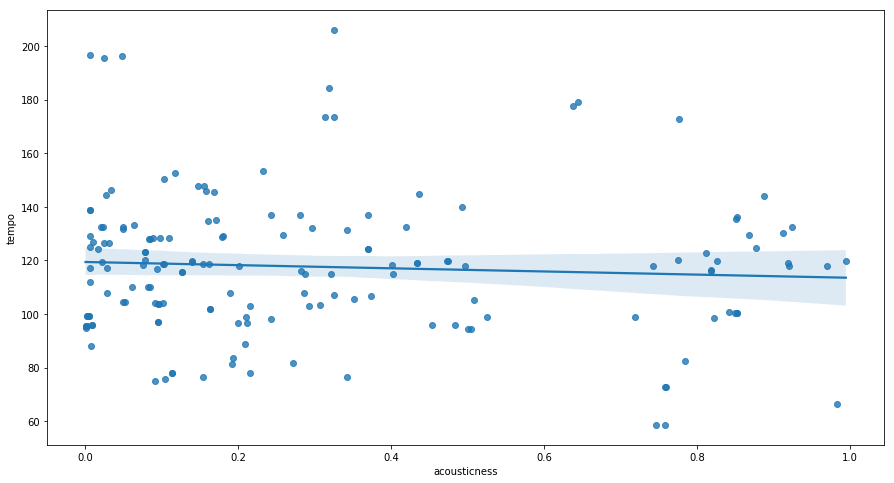

In [59]:
plt.figure(figsize=(15,8))
sns.regplot(x = df['acousticness'], y = df['tempo'])
#No correlation 

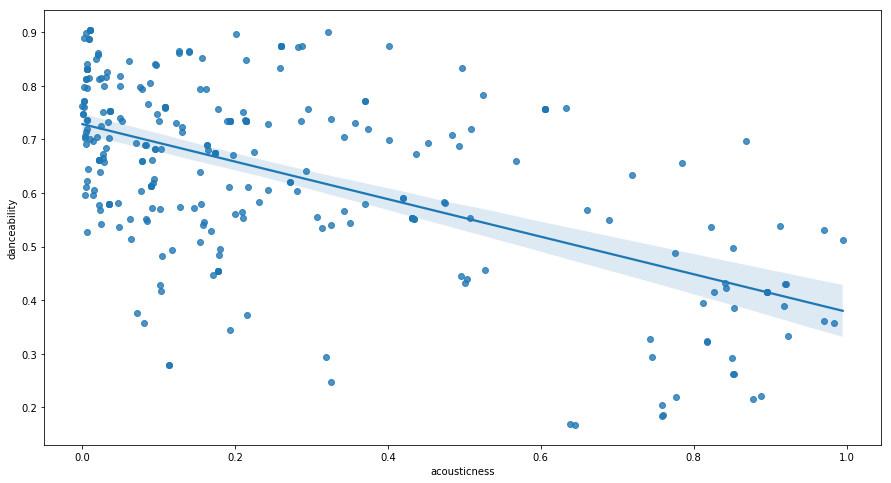

In [160]:
plt.figure(figsize=(15,8))
sns.regplot(x = df['acousticness'], y = df['danceability'])
#Very weak negative correlation

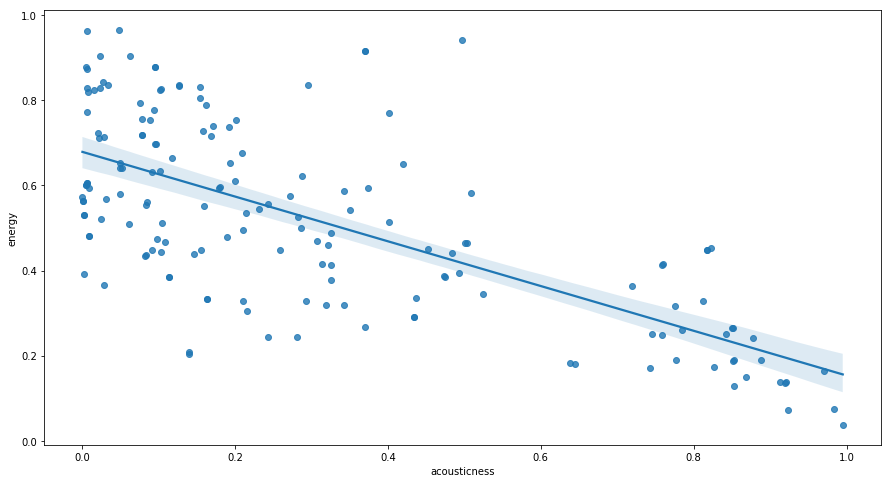

In [62]:
plt.figure(figsize=(15,8))
sns.regplot(x = df['acousticness'], y = df['energy'])
#negative correlation